# PyTorch
PyTorch is a dynamic and powerful tool for building and training machine learning models. It simplifies the process with its fundamental building blocks like tensors and neural networks and offers effective ways to define objectives and improve models using loss functions and optimizers.

**Tensors**: multi-dimensional arrays that serve as a foundational data structure in PyTorch.   
**Neural Nets**: handled by `torch.nn` module  
**Loss Functions**: objective function that needs to be minimized during training  
**Optimizers**: algorithms used to minimize the loss function  
**Datasets and Dataloaders**: useful tools for working with data at scale easily. 
**Training Loops**: fundamental steps for training a deep learning model.  


[PyTorch quickstart tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

## PyTorch Tensors
Generalized versions of vectors and matrices that can have any number of dimensions (i.e. multi-dimensional arrays). They hold data for processing with operations like addition or multiplication.  
[Tensors tutorial](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

### Images as PyTorch Tensors

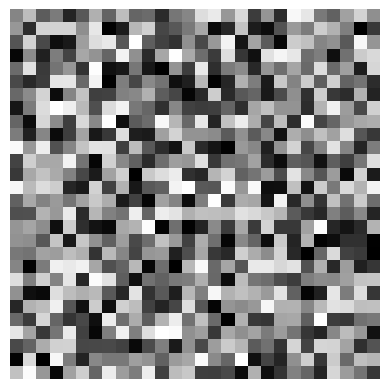

In [2]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

# Displaying Images
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

### Matrix Multiplication

In [4]:
a = torch.tensor([[1, 1], [1, 0]])
print(a)
print(torch.matrix_power(a, 2))
print(torch.matrix_power(a, 3))
print(torch.matrix_power(a, 4))

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


## PyTorch Neural Networks
`nn.Module`: Fundamental building block  
`nn.Linear`: Fully connected layer  
`nn.ReLU`: Non-linear activation function  
`forward method`: Defines forward computation  
[PyTorch Neural Networks tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

In [5]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 2)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

model = MLP(input_size=10)
print(model)

model.forward(torch.rand(10))

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


tensor([0.1286, 0.0329], grad_fn=<ViewBackward0>)

## PyTorch Loss Functions
help in improving the accuracy of a model by measuring errors. They quantify the discrepancy between the predicted output and the actual target values. These functions come in different forms to tackle various problems, like deciding between categories (classification) or predicting values (regression).  
Loss functions to be used are selected based on the type of task and the distribution of data.


### Cross-Entropy Loss
suited for classification task. It's particularly useful when the classes are mutually exclusive.

In [10]:
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where cat = 0 and dog = 1 (corresponding to index 0 and 1)
target_tensor = torch.tensor([1])
target_tensor

tensor([1])

In [16]:
# Prediction: Most likely a dog (index 1 is higher)
# Note that the values do not need to sum to 1
predicted_tensor = torch.tensor([[2.0, 5.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

C:\Users\sumitsaurabh\sumit-saurabh\Practical DL\venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(8.5000)

In [12]:
# Prediction: Slightly more likely a cat (index 0 is higher)
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.9130)

### Mean Squared Error Loss
This shows the average of the squares of the differences between predicted and target values. It's often used for predicting continuous values rather than categories.

In [13]:
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) 

400000000.0


> For both measures of loss, `Lower Loss = Better Model`

## PyTorch Optimizers
help improve how a neural network learns from data by adjusting the model's parameters.

Gradients: Directions and amounts by which a function increases most. The parameters can be changed in a direction opposite to the gradient of the loss function in order to reduce the loss.

Learning Rate: This hyperparameter specifies how big the steps are when adjusting the neural network's settings during training. Too big, and you might skip over the best setting; too small, and it'll take a very long time to get there.

Stochastic Gradient Descent (SGD): This is a fundamental optimizer that updates model parameters based on a subset of data, which can lead to noisy paths towards the optimal solution due to its stochastic nature. To alleviate this techniques such as incoprporating momentum are often introduced.

Momentum: A technique used to accelerate the optimizer in the right direction and reduce oscillations in the loss function by accumulating past gradients.

Adam Optimizer: Another popular optimizer that often works well out of the box and requires minimal hyperparameter tuning.  
[PyTorch Optimization tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)

In [14]:
import torch.optim as optim

# Assuming 'model' is defined neural network
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# lr=0.01 sets the learning rate to 0.01 for either optimizer.
# momentum=0.9 smoothes out updates and can help training

In [15]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

## PyTorch Datasets and Data Loaders


### Dataset Class
This serves as a blueprint for defining how data is accessed and transformed. It can handle tasks like accessing and parsing directories and files.

In [1]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)

# Access a data sample
data_sample = dataset[3]
print(data_sample)
# ((3, 4), 12)

((3, 4), 12)


### Data Loader
This utility wraps around the dataset object to provide batched, shuffled, and parallelized loading of data. It simplifies the process of iterating over data batches during model training and evaluation.

In [2]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)
# [tensor([4, 3, 1]), tensor([5, 4, 2])] tensor([20, 12, 2])
# [tensor([2, 0]), tensor([3, 1])] tensor([6, 0])

[tensor([1, 2, 0]), tensor([2, 3, 1])] tensor([2, 6, 0])
[tensor([4, 3]), tensor([5, 4])] tensor([20, 12])


Batches: Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

Shuffle: It means mixing up the data so that it's not in the same order every time, which helps the AI learn better.

## PyTorch Training Loops
The cycle that a neural network goes through many times to learn from the data by making predictions, checking errors, and improving itself. A PyTorch training loop is an essential part of building a neural network model, which helps us teach the computer how to make predictions or decisions based on data. By using this loop, we gradually improve our model's accuracy through a process of learning from its mistakes and adjusting.

### Create a Number Sum Dataset
This dataset has two features—a pair of numbers—and a target value—the sum of those two numbers.

Note that this is not actually a good use of deep learning. At the end of our training loop, the model still doesn't know how to add 3 + 7! The idea here is to use a simple example so it's easy to evaluate the model's performance.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

### Inspect the Dataset

In [5]:
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(5):
    print(dataset[i])
# (tensor([1., 1.]), tensor([2.]))
# (tensor([1., 2.]), tensor([3.]))
# (tensor([1., 3.]), tensor([4.]))
# (tensor([1., 4.]), tensor([5.]))
# (tensor([1., 5.]), tensor([6.]))

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


### Define a Simple Model
A multi-layer perceptron (MLP) is defined with 128 nodes in the hidden layer and a single output node, using a rectified linear unit (ReLU) as the activation function.

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

### Instantiate Components Needed for Training
The training loop includes essential components such as the dataset, data loader, model, loss function, and optimizer.

Optimizer: Part of the neural network's brain that makes decisions on how to change the network to get better at its job.

In [7]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Create a Training Loop
The loop iterates through a specified number of epochs, processing the entire dataset in batches. For each batch, predictions are made, and the loss is calculated and accumulated.

Batches: Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

Epochs: A complete pass through the entire training dataset. The more epochs, the more the computer goes over the material to learn.

Monitoring Progress: After processing all batches, the total loss for the epoch is printed to monitor training progress. The expectation is that the loss decreases over time, indicating that the model is learning.

In [8]:
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))
    # Epoch 0: Sum of Batch Losses = 118.82360
    # Epoch 1: Sum of Batch Losses = 39.75702
    # Epoch 2: Sum of Batch Losses = 2.16352
    # Epoch 3: Sum of Batch Losses = 0.25178
    # Epoch 4: Sum of Batch Losses = 0.22843
    # Epoch 5: Sum of Batch Losses = 0.19182
    # Epoch 6: Sum of Batch Losses = 0.15507
    # Epoch 7: Sum of Batch Losses = 0.07789
    # Epoch 8: Sum of Batch Losses = 0.06329
    # Epoch 9: Sum of Batch Losses = 0.04936

Epoch 0: Sum of Batch Losses = 211077.64546
Epoch 1: Sum of Batch Losses = 3846.18512
Epoch 2: Sum of Batch Losses = 527.26615
Epoch 3: Sum of Batch Losses = 26.77519
Epoch 4: Sum of Batch Losses = 4.76441
Epoch 5: Sum of Batch Losses = 3.58256
Epoch 6: Sum of Batch Losses = 3.13230
Epoch 7: Sum of Batch Losses = 2.42945
Epoch 8: Sum of Batch Losses = 1.65126
Epoch 9: Sum of Batch Losses = 1.51090


### Try the Model Out
Model Testing: The video concludes with a demonstration of testing the model with specific inputs to see how well it predicts the sum of two numbers.

In [9]:
# Test the model on 3 + 7
model(torch.tensor([3.0, 7.0]))
# tensor([10.1067], grad_fn=<AddBackward0>)

tensor([10.2475], grad_fn=<ViewBackward0>)